In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.transforms as transforms
from matplotlib.patches import Circle

from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Baumans-Regular.ttf')

## Process data

In [23]:
# Load list of european countries
df = pd.read_csv("eurogrid_countries_position.csv")
df.head()

,country,continent,ISO,x,y
0,Albania,Europe,ALB,6.0,9.0
1,Austria,Europe,AUT,5.0,5.0
2,Belarus,Europe,BLR,7.0,4.0
3,Belgium,Europe,BEL,3.0,4.0
4,Bosnia and Herz.,Europe,BIH,6.0,7.0


In [24]:
#create groups based on first letter in ISO
group = []
for i in range(len(df)):
    if df["ISO"][i][0] in  ["A","B","C",]:
        group.append(1)
    elif df["ISO"][i][0] in  ["D","E","F","G",]:
        group.append(2)
    elif df["ISO"][i][0] in  ["H","I","J","K","L",]:
        group.append(3)
    elif df["ISO"][i][0] in  ["M","N","O","P","Q"]:
        group.append(4)
    else:
        group.append(5)

df["group"] = group
df["group"].value_counts()

1    9
3    9
2    8
4    7
5    7
Name: group, dtype: int64

## Visualise

### Circles

In [60]:
#colors
colors = {1: "#000000", 2:"#F9A221",3:"#EE5631", 4: "#FDAEA2", 5:"#4F90B0"}
bg = "#EDE2CC"

#create custom legend
legend = {"y" :[-0.15]*5,
          "x": [(i+0.11) * 1.5 for i in [0.1, 0.15, 0.2, 0.25, 0.3]],
          "s": [50]*5, 
          "c": list(colors.values()), 
          "lw": [0]*5,
          "l" : ['A-C', 'D-G', 'H-L', 'M-Q', 'R-Z']
          }

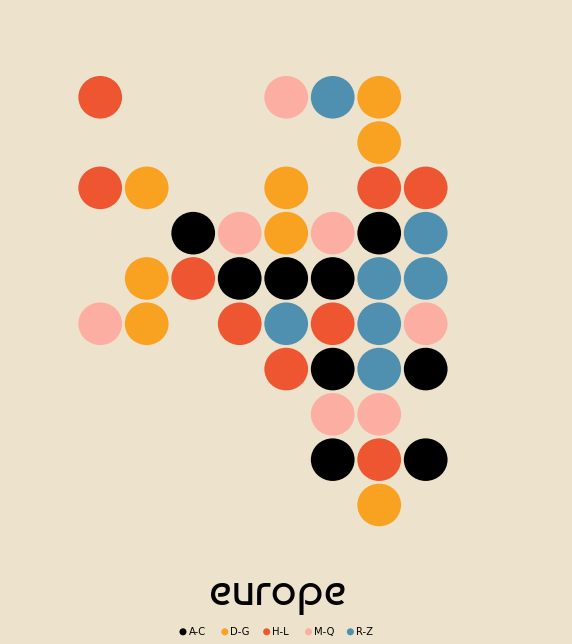

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor(bg)

#format axis
ax.axis([-1, 11, -1, 11])
ax.invert_yaxis()
ax.axis("off")

#add patches
for i in range(len(df)):
    center = (df["x"][i],df["y"][i])

    kw = dict(radius=0.47, linewidth=0., )
    shape = Circle(center, **kw,
                    fill=True,
                    color=colors[df["group"][i]])
    ax.add_patch(shape)     

#add legend
trans = transforms.blended_transform_factory(ax.transAxes, ax.transAxes)
ax.scatter(legend["x"],legend["y"], s=legend["s"], color=legend["c"], linewidth=legend["lw"],  transform=trans, clip_on=False)
for i, text in enumerate(legend["l"]):
    ax.text(legend["x"][i]+0.01,legend["y"][i], text, transform=trans, ha="left", va="center")

#title
plt.figtext(0.5,0.05, 'europe', ha="center",fontsize = 45, fontproperties=title_font)

#save output  ----------------------
#plt.savefig('europe-grid-iso-names.png', bbox_inches='tight', pad_inches=1, facecolor=bg, dpi=120)

plt.show()
